# This script is used to test which metric should be calculated for the simulation

Author: Yaolin Ge
Email: geyaolin@gmail.com
Date: 2023-07-27

In [49]:
import numpy as np
from scipy.stats.stats import pearsonr
import matplotlib.pyplot as plt

/var/folders/jp/xhxlmldn7ng80x2wd443h8k80000gn/T/ipykernel_33519/2796820744.py:2: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


# Metric: correlation coefficient (CC)

In [43]:
x1 = np.random.rand(100, 1)
x2 = np.random.rand(100, 1)


def corr1(x, y): 
    d1 = x - np.mean(x)
    d2 = y - np.mean(y)

    cov = d1.T @ d2

    corr = cov / (np.std(x) * np.std(y)) / len(x)
    return corr

def corr2(x, y): 
    d1 = x - np.mean(x)
    d2 = y - np.mean(y)

    cov = d1.T @ d2

    corr = cov / np.linalg.norm(d1) / np.linalg.norm(d2)
    return corr

def corr3(x, y):
    return pearsonr(x.flatten(), y.flatten())[0]

# calculate the covariance between two vectors
def corr4(x, y):
    # mean of x and y
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    # calculate covariance
    cov = 0.0
    sigma_x = .0
    sigma_y = .0
    for i in range(len(x)):
        cov += (x[i] - x_mean) * (y[i] - y_mean)
        sigma_x += (x[i] - x_mean) ** 2
        sigma_y += (y[i] - y_mean) ** 2
    cov = cov / (len(x) - 1)
    sigma_x = np.sqrt(sigma_x / (len(x) - 1))
    sigma_y = np.sqrt(sigma_y / (len(y) - 1))
    return cov / (sigma_x * sigma_y)



In [40]:
%timeit corr3(x1, x2)

421 µs ± 9.47 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [41]:
%timeit corr1(x1, x2)

44.8 µs ± 545 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [42]:
%timeit corr2(x1, x2)

21.6 µs ± 184 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [44]:
%timeit corr4(x1, x2)

976 µs ± 4.82 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [45]:
c1 = corr1(x1, x2)
c2 = corr2(x1, x2)
c3 = corr3(x1, x2)
c4 = corr4(x1, x2)

print(c1, c2, c3, c4)


[[-0.06110451]] [[-0.06110451]] -0.061104505902692896 [-0.06110451]


array([-0.0362076])

# Metric: Classification Error (CE)

In [59]:
x = np.random.randint(0, 100, 100)
y = np.random.randint(0, 100, 100)
threshold = 50
X = np.where(x > threshold, 1, 0)
Y = np.where(y > threshold, 1, 0)

CE = np.sum(np.abs(X - Y)) / len(X)

def cal_classification_error(x, y, threshold): 
    X = np.where(x > threshold, 1, 0)
    Y = np.where(y > threshold, 1, 0)

    CE = np.sum(np.abs(X - Y)) / len(X)
    return CE


In [60]:
CE == cal_classification_error(x, y, threshold)

True

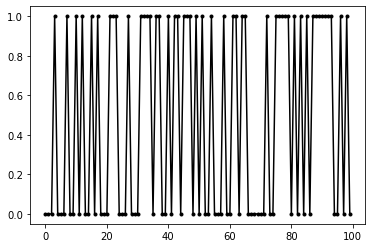